# PIA
# Parte II. Modelos de supervivencia
*Estadística Aplicada*

**Integrantes:** 

Miguel Ángel Jalomo Hernández    1857876

Verónica Vanessa Aguilar Ortiz   1855188


**Grupo:** 051


**1. Añadirás una primera parte a la notebook llamada introducción. Hablaras
del problema de supervivencia que te toco analizar: ¿qué mide? ¿cuál es
el evento? ¿qué tiempo es el que se mide?**

A continuación se realizara un modelo de supervivencia, donde analizaremos sobre el abandono de empleaddos en una empresa, donde nos ayudara a saber que razones podrian ser las causantes de que se provoque rotación de personal.

En la base de datos "time_spend_company" nos señala el número de años que empleado ha estado en la empresa y "left" señala el eveto, si el empleado dejo la emprsa.
Se realizara un analisis de supervivencia para tratar de saber que factores afectan que el empleado deje la empresa.



**2. Comenta quien podría estar interesado en el análisis de supervivencia de
tu base de datos, y por qué consideras importante realizar un modelo de
supervivencia para tu base de datos (¿qué nos permite conocer o saber?)**


Este analisis le podria interesar al Jefe de la empresa o a Recusos Humanos ya que, tener rotación de personal le afecta a la empresa, se pierde el equilibrio que se va generando con el tiempo, y hablando del tiempo, el tener que dar nuevas capacitaciones este se pierde. Y este ánalisis de supervivencia nos permite conocer las posibles causas sobre la rotación de personal.

In [32]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [33]:
from lifelines import CoxPHFitter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
empleo =  pd.read_csv("https://raw.githubusercontent.com/RoniAguilar/PIA_Estad-sticaAplicada-/main/employee_attrition%20(2).csv")

In [35]:
empleo

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**3. Comenta si tu base de datos posee censura ( y en tu caso qué significa la
censura para tu base de datos en particular)**


Nuestra base de datos si posee censura en "left", es la variable que utilizaremos para saber si el empleado dejo la empresa. Donde 1 es que el empleado se salió de la empresa y 0 que no ha reportado nada.

**4. Convierte las variables de opciones a categóricas, es decir, si tienes (si, no,
no se) convierte a (1, 2 ,3). Convierte las dummys tambien.**

In [36]:
dummys_salary = [ 'salary']

for i in dummys_salary:
 empleo[i] = empleo[i].map({'low':1, 'medium':2,'high':3})

In [37]:
empleo

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


**5. Cerciórate de no tener missing values o valores repetidos, en caso de
tenerlos corrige la base de datos**


In [38]:
empleo.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Nuestra base de datos no tiene missing values 

In [39]:
empleo.drop_duplicates(inplace = True)

In [40]:
empleo

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,3
11996,0.74,0.95,5,266,10,0,0,1,management,3
11997,0.85,0.54,3,185,10,0,0,1,management,3
11998,0.33,0.65,3,172,10,0,0,1,marketing,3


Eliminamos filas repetidas

**6. Calcula las estadísticas descriptivas de las variables. Comenta las
estadísticas descriptivas de las dummys y de las numéricas.**

In [41]:
empleo.describe()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,1.60387
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,2.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.00000


Tenemos en nuestra base de datos 11991 empleados.

En las variables númericas tenemos que el promedio de satisfacción tenemos una media buena de 62.96%, y la mayoria de sus empleados tienen buen nivel de satisfacción, lo que nos indica un buen punto para la empresa, en la variable de la última evaluación de igual manera tenemos los mismos resultados. Para el número de proyetos tenemos que el máximo aplicado es de 7, y los empleados tienen una media de 4 aproximadamente. El máximo de horas trabajadas fue de 310, y el 75% de los empleados tienen aproximadamente 243 horas trabajadas. Para el tiempo de empleados en la compañia podemos ver algo muy significativo, que el total de meses es 10 y la media es un poco más de 3 meses, lo que nos da a entender que los trabajadores no suelen tener mucha permanencia en esta empresa. En el salario la mayoria de los trabajadores tienen un sueldo medio.


**7. Calcula el tiempo promedio de supervivencia de la base de datos**

In [42]:
time_mean = empleo['time_spend_company'].mean()
print(f'El tiempo promedio de supervivencia de la base de datos es de: {time_mean}')

El tiempo promedio de supervivencia de la base de datos es de: 3.3648569760653824


**8. Calcula la función de supervivencia y grafícala utilizando Kaplan-Meier y
obtén la mediana ¿qué significa la mediana?**

In [43]:
from lifelines import*

In [44]:
from lifelines import KaplanMeierFitter

In [45]:
KMF = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

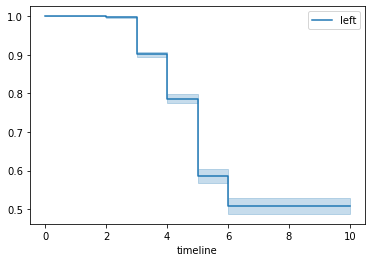

In [46]:
KMF.fit(empleo['time_spend_company'],empleo['left'], label = "left").plot()

In [47]:
KMF.survival_function_

,left
timeline,
0.0,1.000000
2.0,0.997415
3.0,0.901419
4.0,0.786743
5.0,0.585677
6.0,0.508203
7.0,0.508203
8.0,0.508203
10.0,0.508203


In [48]:
median = KMF.median_survival_time_

In [49]:
median

inf

Tenemos que el valor de la mediana de supervivencia nos da inf porque como sabemos la mediana es donde se acumula el 50%. En este caso nos indica que es inf, ya que en la curva de supervivencia no se obserba ese punto en los datos.

**9. Elige una variable categórica o construye una (por ejemplo para la del
crédito bancario, si debe 0-250mil dolares, 251-500mil, y mas de 500 mil),
y estima y grafica la función de supervivencia para cada grupo**

Tomaremos la variable "Salary" para realizar la función de supervivencia

In [50]:
low = empleo[empleo['salary'] == 1]
medium = empleo[empleo['salary'] == 2]
high = empleo[empleo['salary'] == 3]

time_low = low['time_spend_company']
evento_low = low['left']

time_medium = medium['time_spend_company']
evento_medium = medium['left']

time_high = high['time_spend_company']
evento_high = high['left']

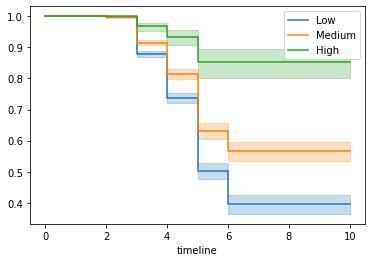

In [51]:
ax = plt.subplot(111)
ax = KMF.fit(time_low,evento_low,label = "Low").plot(ax=ax)
ax = KMF.fit(time_medium,evento_medium,label = "Medium").plot(ax=ax)
ax = KMF.fit(time_high,evento_high,label = "High").plot(ax=ax)

Vemos que el salario si afecta a que los empleados dejen la empresa ya que a los que les pagan menos suelen salirse de la empresa.

**10.Prueba Si las funciones de supervivencia son distintas usando el log rank
test y comenta el resultado**

In [52]:
from lifelines.statistics import multivariate_logrank_test
result = multivariate_logrank_test(empleo['time_spend_company'], empleo['salary'], empleo['left'])
result.test_statistic
result.p_value
result.print_summary()

C:\Users\veron\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         194.64 <0.005    140.40

Tenemos que nuestras pruebas de hipotesis son: 

H0: Las funciones de supervivenvia son iguales            
H1: Las funciones de supervivenvia NO son iguales

Entonces teniendo en cuenta que nuestro p-valor es de 0.005, por lo tanto, SI se rechaza H0 por lo tanto las funciones de supervivenvia NO son iguales. Lo que conluimos que el salario si afecta significativamente a que el empleado deje o no la empresa.

**11.Ahora estima un modelo de Cox, utilizando todas las variables
disponibles para predecir el riesgo de sufrir el evento**

In [53]:
empleo

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,3
11996,0.74,0.95,5,266,10,0,0,1,management,3
11997,0.85,0.54,3,185,10,0,0,1,management,3
11998,0.33,0.65,3,172,10,0,0,1,marketing,3


In [54]:
categoricas = ['department']

for i in categoricas:
 empleo[i] = empleo[i].astype('category')
 empleo[i] = empleo[i].cat.codes

In [59]:
empleo

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,3
11996,0.74,0.95,5,266,10,0,0,1,4,3
11997,0.85,0.54,3,185,10,0,0,1,4,3
11998,0.33,0.65,3,172,10,0,0,1,5,3


In [55]:
cph = CoxPHFitter()
cph.fit(empleo, duration_col='time_spend_company', event_col='left')

<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>

In [56]:
cph.print_summary()

C:\Users\veron\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 11991 total observations, 10000 right-censored observations>
             duration col = 'time_spend_company'
                event col = 'left'
      baseline estimation = breslow
   number of observations = 11991
number of events observed = 1991
   partial log-likelihood = -15901.72
         time fit was run = 2022-05-24 13:18:35 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
satisfaction_level     -2.42       0.09       0.09            -2.59            -2.24                 0.07                 0.11
last_evaluation        -0.10       0.90       0.14            -0.38             0.17                 0.69                 1.19
number_projects        -0.29       0.75       0.02            -0.33            -0.25                 0.72                 0.78
average_montly_hours    0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
work_accident          -1.25       0.29       0.10            -1.45            -1.05                 0.24                 0.35
promotion_last_5years  -1.43       0.24       0.35            -2.13            -0.74                 0.12                 0.48
department              0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
salary                 -0.52       0.60       0.04            -0.59            -0.44                 0.55                 0.64

                        cmp to      z      p   -log2(p)
covariate                                              
satisfaction_level        0.00 -26.87 <0.005     525.88
last_evaluation           0.00  -0.73   0.46       1.11
number_projects           0.00 -14.79 <0.005     162.09
average_montly_hours      0.00   3.81 <0.005      12.80
work_accident             0.00 -12.44 <0.005     115.55
promotion_last_5years     0.00  -4.04 <0.005      14.20
department                0.00   3.19 <0.005       9.46
salary                    0.00 -13.19 <0.005     129.60
---
Concordance = 0.84
Partial AIC = 31819.43
log-likelihood ratio test = 1325.62 on 8 df
-log2(p) of ll-ratio test = 930.70

**12.Interpreta cada uno de los coeficientes obtenidos. Utiliza cph.plot() para
ayudarte con la interpretación.**

<AxesSubplot:xlabel='log(HR) (95% CI)'>

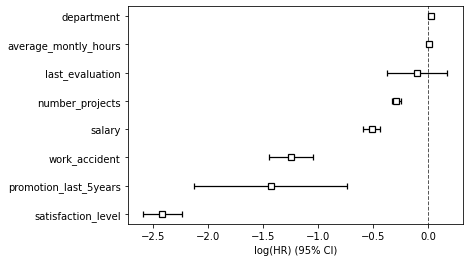

In [57]:
cph.plot() 

Tenemos que nuestra alfa es de 5% entonces tenemos que el salario, el nivel de satisfaccion, el numero de proyectos, los accidentes de trabajo, son las variables que más afectan a la  toma de decision del empleado de dejar o no la empresa.

**13. Por último, que recomendaciones se pueden derivar de tu modelo, para
el caso del crédito que recomendaciones darías al banco sobre su
proceso de otorgamiento de créditos en caso de que quieran que le
paguen rápido. Para el caso de empleo, la empresa podría evitar la
rotación de personal y en caso de que si, cómo podría hacerlo**

Uno de los problemas en la empresa, es el salario ya que observamos que los empleados que reciben un salario menor tienden a ser los que abandonan la empresa, entonces la empresa debe de realizar un analisis para saber sien cada area se paga un salario adecuado y en dado caso de que no, reajustar estos, al igual se tiene que aumentar el nivel de satisfacción de los empleados, esto se puede mejorar inclyendo más tipos de beneficios para los empleados.

**14.Por ultimo investiga y señala las limitaciones de Kaplan-Meier y del
modelo de Cox**

Limitaciones

Kaplan Meier - Al realizar este proyecto nos pudimos dar cuenta de que este modelo tiene principalmente una limitación la cual es que como solo estudia el efecto de un factor a lo largo del tiempo, esto no nos permite utilizar este modelo para realizar un analisis multivariado.

Modelo de Cox - Creemos que la principal desventaja que tiene este modelo es que al realizarlo este supone que la tasa de riesgo es constante en el tiempo.